In [53]:
%matplotlib inline

# Riconoscere numeri scritti a mano
Utilizziamo scikit-learn e vari classificatori noti per riconoscere numeri da 0-9 scritti a mano!

In [54]:
import matplotlib.pyplot as plt
import pandas as pd 

# Import datasets, classifiers and performance metrics
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score
from sklearn.model_selection import train_test_split

In [55]:
import numpy as np
np.random.seed(42)

## Digits dataset

Questo dataset di cifre è composto da immagini a risoluzione 8x8. 
Ossia, sono matrici 8x8 di valori in scala di grigi per ogni immagine. 

L'attributo ``images`` un vettore raffigurante la matrice delle varie immagini mentre l'attributo ``target`` contiene la classificazione per quei valori (cioè un numero da 0 a 9).

Stampiamo le prime 4 immagini del dataset!

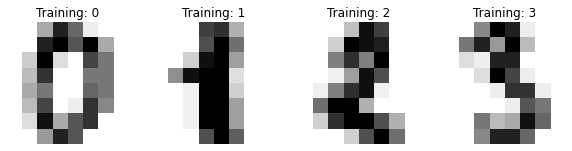

In [56]:
digits = datasets.load_digits() # carichiamo il dataset dalla libreria di scikit-learn

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3)) # creiamo un plot che contiene 1 riga e 4 colonne

for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off() #cancelliamo gli assi
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest") # stampiamo una immagine per ogni cella
    ax.set_title("Training: %i" % label)

# Data exploration

### Convert digits to pandas dataframe

In [57]:
data = pd.DataFrame(digits.data, columns=digits.feature_names)
data['target'] = pd.Series(digits.target)

In [58]:
data

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9


In [59]:
data.describe()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496,4.490818
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122,2.865304
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000,2.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000,4.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000,7.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,9.000000


# Data visualization

In [60]:
import plotly
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [61]:
fig1 = px.pie(data, names='target', title='Digits')
fig1.show()

In [62]:
fig = px.histogram(data, x="target")
fig.update_layout(bargap=0.2)
fig.show()

## Classificazione

Per applicare un classificatore a questi dati, dobbiamo appiattire le immagini, trasformando ogni array 2-D di valori in scala di grigi dalla forma ``(8, 8)`` nella forma ``(64,)``. Successivamente, l'intero set di dati sarà di forma ``(n_samples, n_features)``, dove ``n_samples`` è il numero di immagini e ``n_features`` è il numero totale di pixel in ogni immagine (cioè 64).

Possiamo quindi dividere i dati in sottoinsiemi di training e test e scegliere un modello di classificazione su cui fare training! 

Il classificatore adattato può essere successivamente utilizzato per prevedere il valore della cifra per nel test-set!

In [63]:
# flatten the images
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

print(data)

# Normalization

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

print(data)

In [65]:
# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.7, shuffle=True
)

## Decision trees

In [66]:
# Create a classifier: a support vector classifier
dtree = DecisionTreeClassifier()

# Learn the digits on the train subset
dtree.fit(X_train , y_train)
# Predict the value of the digit on the test subset
predicted = dtree.predict(X_test)

Di seguito visualizziamo i primi 4 campioni di prova e mostriamo le loro previsioni.

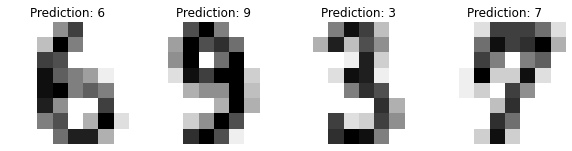

In [67]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {prediction}")

La funzione ``classification_report`` mostra tutte le metriche principali per misurare le performance del modello.

In [68]:
print(
    f"Classification report for classifier {dtree}:\n"
    f"{classification_report(y_test, predicted)}\n"
)

Classification report for classifier DecisionTreeClassifier():
              precision    recall  f1-score   support

           0       0.89      0.95      0.92       117
           1       0.72      0.67      0.70       125
           2       0.82      0.80      0.81       117
           3       0.85      0.72      0.78       128
           4       0.82      0.74      0.78       121
           5       0.85      0.75      0.79       134
           6       0.88      0.86      0.87       140
           7       0.75      0.92      0.82       130
           8       0.64      0.70      0.67       115
           9       0.74      0.80      0.77       131

    accuracy                           0.79      1258
   macro avg       0.80      0.79      0.79      1258
weighted avg       0.80      0.79      0.79      1258




We can also plot a `confusion matrix <confusion_matrix>` of the
true digit values and the predicted digit values.



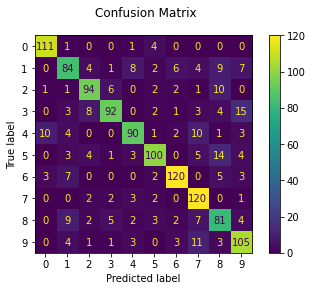

In [69]:
cm = confusion_matrix(y_test, predicted, labels=dtree.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=dtree.classes_)
disp.plot()
plt.suptitle("Confusion Matrix")
plt.show()

# Random Forest

In [70]:
from sklearn.ensemble import RandomForestClassifier
rforest = RandomForestClassifier()
rforest.fit(X_train , y_train)
predicted = rforest.predict(X_test)

In [71]:
print(
    f"Classification report for classifier {rforest}:\n"
    f"{classification_report(y_test, predicted)}\n"
)

Classification report for classifier RandomForestClassifier():
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       117
           1       0.94      0.97      0.95       125
           2       0.93      0.93      0.93       117
           3       0.97      0.89      0.93       128
           4       0.98      0.98      0.98       121
           5       0.96      0.96      0.96       134
           6       0.99      0.98      0.99       140
           7       0.92      0.98      0.95       130
           8       0.90      0.91      0.91       115
           9       0.94      0.91      0.92       131

    accuracy                           0.95      1258
   macro avg       0.95      0.95      0.95      1258
weighted avg       0.95      0.95      0.95      1258




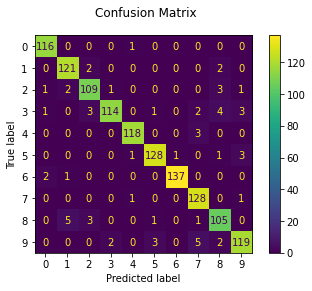

In [72]:
cm = confusion_matrix(y_test, predicted, labels=rforest.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=rforest.classes_)
disp.plot()
plt.suptitle("Confusion Matrix")
plt.show()

# KNN 

In [73]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train ,y_train)

KNeighborsClassifier()

In [74]:
predicted = knn.predict(X_test)
accuracy_score(predicted,y_test)

0.9689984101748808

In [75]:
print(
    f"Classification report for classifier {rforest}:\n"
    f"{classification_report(y_test, predicted)}\n"
)

Classification report for classifier RandomForestClassifier():
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       117
           1       0.95      0.99      0.97       125
           2       0.97      0.99      0.98       117
           3       0.98      0.94      0.96       128
           4       0.98      0.99      0.98       121
           5       0.96      0.97      0.97       134
           6       1.00      1.00      1.00       140
           7       0.94      1.00      0.97       130
           8       0.94      0.91      0.93       115
           9       0.97      0.89      0.93       131

    accuracy                           0.97      1258
   macro avg       0.97      0.97      0.97      1258
weighted avg       0.97      0.97      0.97      1258




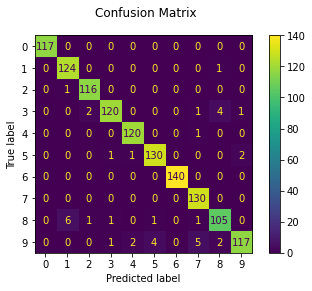

In [76]:
cm = confusion_matrix(y_test, predicted, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=knn.classes_)
disp.plot()
plt.suptitle("Confusion Matrix")
plt.show()